# KNN Classifier

### Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
print(X_train[0:5])
print(y_train[0:5])

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


In [6]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Encodings dictionary: 
{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
results shape: 30
[ True] [30]
Results: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Result: --------------------------
{'counts': {'True': 30}, 'accuracy': 100.0}
Encodings dictionary: 
{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
results shape: 30
[False  True] [ 1 29]
Results: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
Result: --------------------------
{'counts': {'False': 1, 'True': 29}, 'accuracy': 96.66666666666667}
Encodings dictionary: 
{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
results shape: 30
[False  True] [ 1 29]
Results: [True, True, True, True, True, True, True, True, True, True, T

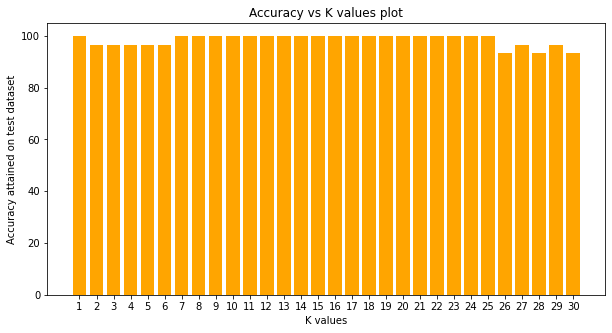

In [7]:
class KNN:
    def __init__(self, X, y, num_of_neighbours=10, cost_metric='Euclidean', choice_metric='max'):
        '''
        Input: X: (no_of_samples, no_of_features) (np.ndarray of float) [standard] (training data features)
               y: (no_of_samples, 1) (np.ndarray of Strings) [standard] (training data ground truth labels (strings))
        '''
        self.k = num_of_neighbours
        self.cost_metric = cost_metric
        self.choice_metric = choice_metric
        self.X_train = X
        self.y_train = y
        self.y_encoded_train, self.encoding_dict = self.encode(y)

    def encode(self, y):
        '''
        Input: y: (no_of_samples, 1) (np.ndarray of strings) 
        Encodes each string to a particular number and returns the encoded y and the encoding dictionary
        Return: y_encoded, encodings_dictionary
            1. y_encoded (no_of_samples, 1) (np.ndarray of integers)
            2. encodings_dictionary structure:
                {
                    string_encoding: int_key
                } 
                That is, let us say we have the following car classes as input ['ford', 'bugati', 'merc']
                then encoding_dict will be:
                encoding_dict: {
                    'ford': 1,
                    'bugati': 2,
                    'merc': 3
                } 
                This method of helps in faster encoding. This would be slightly slower at output prediction
        '''
        labels = np.unique(y)
        encoding_dict = {}
        for i, label in enumerate(labels):
            encoding_dict[label] = int(i+1)
        y_encoded = []
        for label in y:
            y_encoded.append(int(encoding_dict[label]))
        print("Encodings dictionary: \n{}".format(encoding_dict))
        return np.array(y_encoded), encoding_dict

    def euclidean_dist(self, x1, x2):
        '''
        Calculates the euclidean distance between x1 and x2 (np.sum((X-Y)**2))
        Input: x1 (3, 1) or (1, 3) vector
               x2 (3, 1) or (1, 3) vector
        Output: float (distance)
        '''
        x1_f = x1.flatten()
        x2_f = x2.flatten()
        if x1.shape != x2.shape:
            print("Error: Mismatched shapes in euclidean distance function: {}, {}".format(x1.shape, x2.shape))
            exit()
        dist = (x1_f-x2_f)**2
        dist = dist.flatten()
        dist = np.sqrt(np.sum(dist))
        return dist

    def get_nearest_neighbours(self, X):
        '''
        Input: X: (1, no_of_features) (np.ndarray) [standard]
        Return: K nearest neighbours based on cost_metric (np.ndarray) (distances, labels)
            1. If cost_metric=='Euclidean': then returns asending order based on distance values
        '''
        x = X.flatten()
        nearest_neighbours = []
        if self.cost_metric=='Euclidean':
            neighbours = []
            for i, point in enumerate(self.X_train):
                dist = self.euclidean_dist(X, point)
                label = self.y_encoded_train[i]
                label_str = self.y_train[i]
                neighbours.append([dist, label_str])
            neighbours.sort(key = lambda tup: tup[0])
            # print("Sorted first neighbours: {}".format(neighbours[0:10])) # Debugging statement
            nearest_neighbours = neighbours[0:self.k]

        return np.array(nearest_neighbours)

    def predict(self, X):
        '''
        Input: X: (no_of_samples, no_of_features)
        Output: Predicted labels (strings) for each sample - (no_of_samples, ) (1D np array)
        '''
        output = []
        for row in X:
            nearest_neighbours = self.get_nearest_neighbours(row)[:, 1] # Only labels
            # print(nearest_neighbours)
            label = max(set(nearest_neighbours), key=list(nearest_neighbours).count)
            output.append(label)
        return np.array(output)

    def test(self, X, y):
        '''
        Input: X: (no_of_samples, no_of_features) - data, y: (no_of_samples) - labels (np arrays)
        Output: dictionary
            result = {
                'counts': {
                    'True': no of correct predictions,
                    'False': no of incorrect predictions
                },
                'accuracy': accuracy in %
            }
        '''
        y_pred = self.predict(X)

        results = []
        for i in range(len(y_pred)):
            if y_pred[i]==y[i]:
                results.append(True)
            else:
                results.append(False)

        # print("y_pred.shape: {}".format(y_pred.shape))
        # results = [y_pred==y]
        print("results shape: {}".format(len(results)))
        unique, counts = np.unique(results, return_counts=True)  
        # for i, y_prediction in enumerate(y_pred):
        #     print(y_prediction, y[i])
        print(unique, counts)
        result = {}  
        result['counts'] = {}  
        for i, label in enumerate(unique):  
            result['counts'][str(label)] = counts[i]
        print("Results: {}".format(results))
        # print("No of true(correct) and false(wrong) predictions: {}".format(result['counts']))
        # print(len(y_pred))
        # print(len(y))
        # print(y_pred.shape)
        # print(y.shape)
        # print([y_pred==y])
        accuracy = (result['counts']['True']*100.0)/(len(y_pred))
        result['accuracy'] = accuracy
        return result


# Train KNNs with various values of K and plot of bar graph of k vs accuracy
results_dict = {}
for i in range(1, 31):
    k = i
    knn_model = KNN(X_train, y_train, num_of_neighbours=k)
    result = knn_model.test(X_test, y_test)
    print("Result: --------------------------\n{}".format(result))
    results_dict['{}'.format(k)] = result['accuracy']

k_values = list(results_dict.keys())
accuracy = list(results_dict.values())
  
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(k_values, accuracy, color ='orange',
        width = 0.8)
 
plt.xlabel("K values")
plt.ylabel("Accuracy attained on test dataset")
plt.title("Accuracy vs K values plot")
plt.show()
# print("Test value: {}, {}".format(X_test[0], y_test[0]))
# print("Nearest neighbours in sorted order: {}".format(knn_model.get_nearest_neighbours(X_test[0])))